In [19]:
import tensorflow as tf
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.utils import plot_model

In [5]:
past_n = 60
future_pred = 60
features = [1, 2, 3]

In [21]:
# https://github.com/cure-lab/LTSF-Linear/blob/main/models/NLinear.py
xIn = Input(shape=(past_n, future_pred, len(features)))
last = xIn[:,-1:,:]
x = xIn - last
x = tf.transpose(x, (0, 0, 2, 1))
x = Dense(future_pred, activation=None)(x)
x = tf.transpose(x, (0, 0, 2, 1))
xOut = tf.squeeze(x)
model = Model(inputs=xIn, outputs=xOut)

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, 60, 60, 3)]  0           []                               
                                                                                                  
 tf.__operators__.getitem_10 (S  (None, 1, 60, 3)    0           ['input_7[0][0]']                
 licingOpLambda)                                                                                  
                                                                                                  
 tf.math.subtract_5 (TFOpLambda  (None, 60, 60, 3)   0           ['input_7[0][0]',                
 )                                                                'tf.__operators__.getitem_10[0][
                                                                 0]']                       

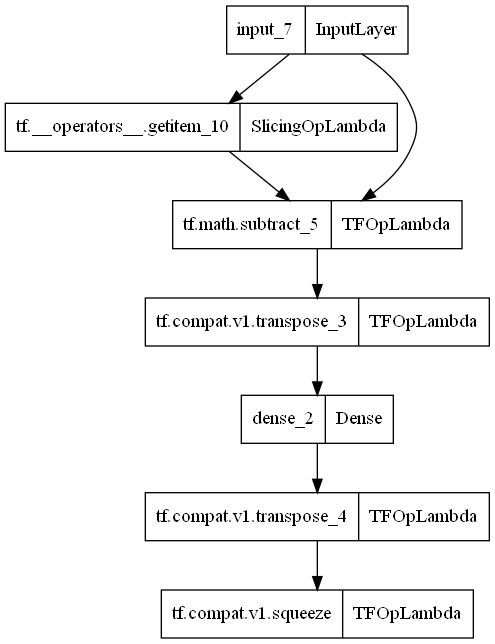

In [22]:
model.summary()
plot_model(model)